In [1]:
# Import necessary libraries
from google.colab import drive
import networkx as nx
import matplotlib.pyplot as plt

# Install the community detection library
!pip install python-louvain


In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your file in Google Drive
file_path = '/content/drive/MyDrive/GoogleColab/web social media anlysis and visualization/facebook_combined.txt'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Create a graph and add edges from the file
G = nx.Graph()
with open(file_path, 'r') as file:
    for line in file:
        nodes = line.strip().split()
        G.add_edge(int(nodes[0]), int(nodes[1]))

# Print basic statistics about the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 4039
Number of edges: 88234


In [4]:
# Calculate various centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Identify and print the most important nodes based on each centrality measure
print("Most important nodes by centrality measure:")
print("Degree Centrality:", max(degree_centrality, key=degree_centrality.get))
print("Closeness Centrality:", max(closeness_centrality, key=closeness_centrality.get))
print("Betweenness Centrality:", max(betweenness_centrality, key=betweenness_centrality.get))


Most important nodes by centrality measure:
Degree Centrality: 107
Closeness Centrality: 107
Betweenness Centrality: 107


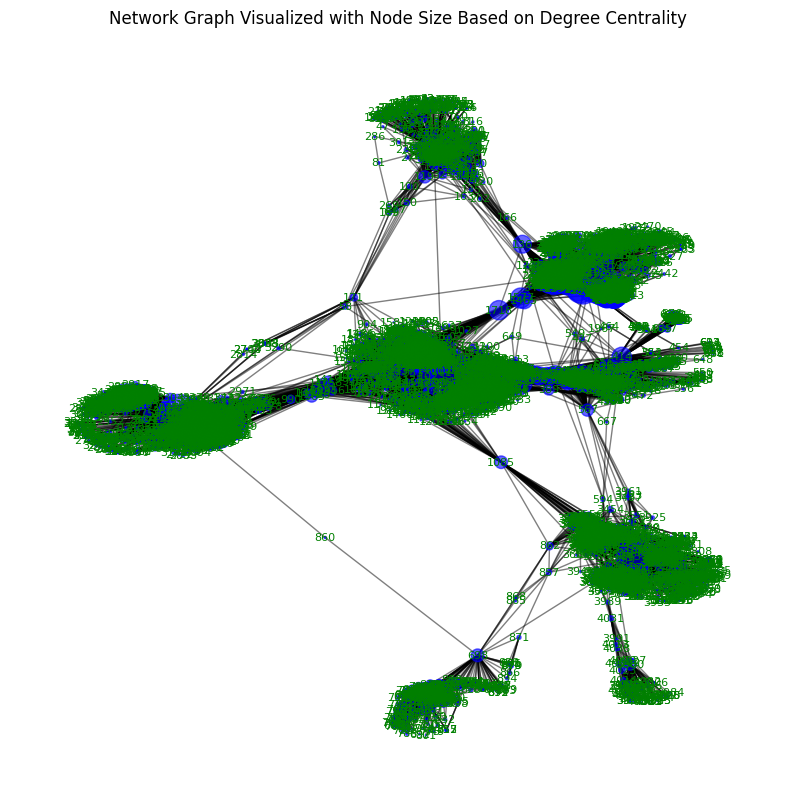

In [5]:
# Visualize the graph with node size based on degree centrality
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes with a fixed seed for reproducibility

node_sizes = [5000 * degree_centrality[n] for n in G]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', alpha=0.6)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='green')

plt.title("Network Graph Visualized with Node Size Based on Degree Centrality")
plt.axis('off')
plt.show()


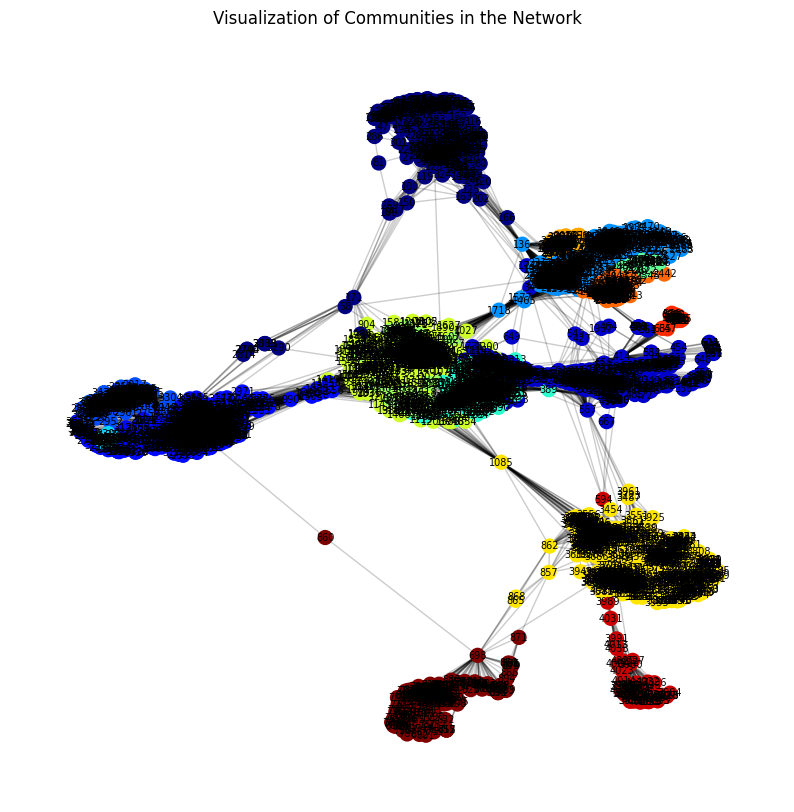

Number of communities detected: 16


In [6]:
from community import community_louvain

# Community detection with the Louvain method
partition = community_louvain.best_partition(G)

# Visualization of the communities
community_colors = [partition[n] for n in G.nodes()]

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color=community_colors, node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=7, font_color='black')

plt.title("Visualization of Communities in the Network")
plt.axis('off')
plt.show()

# Print the number of communities detected
print(f"Number of communities detected: {len(set(partition.values()))}")


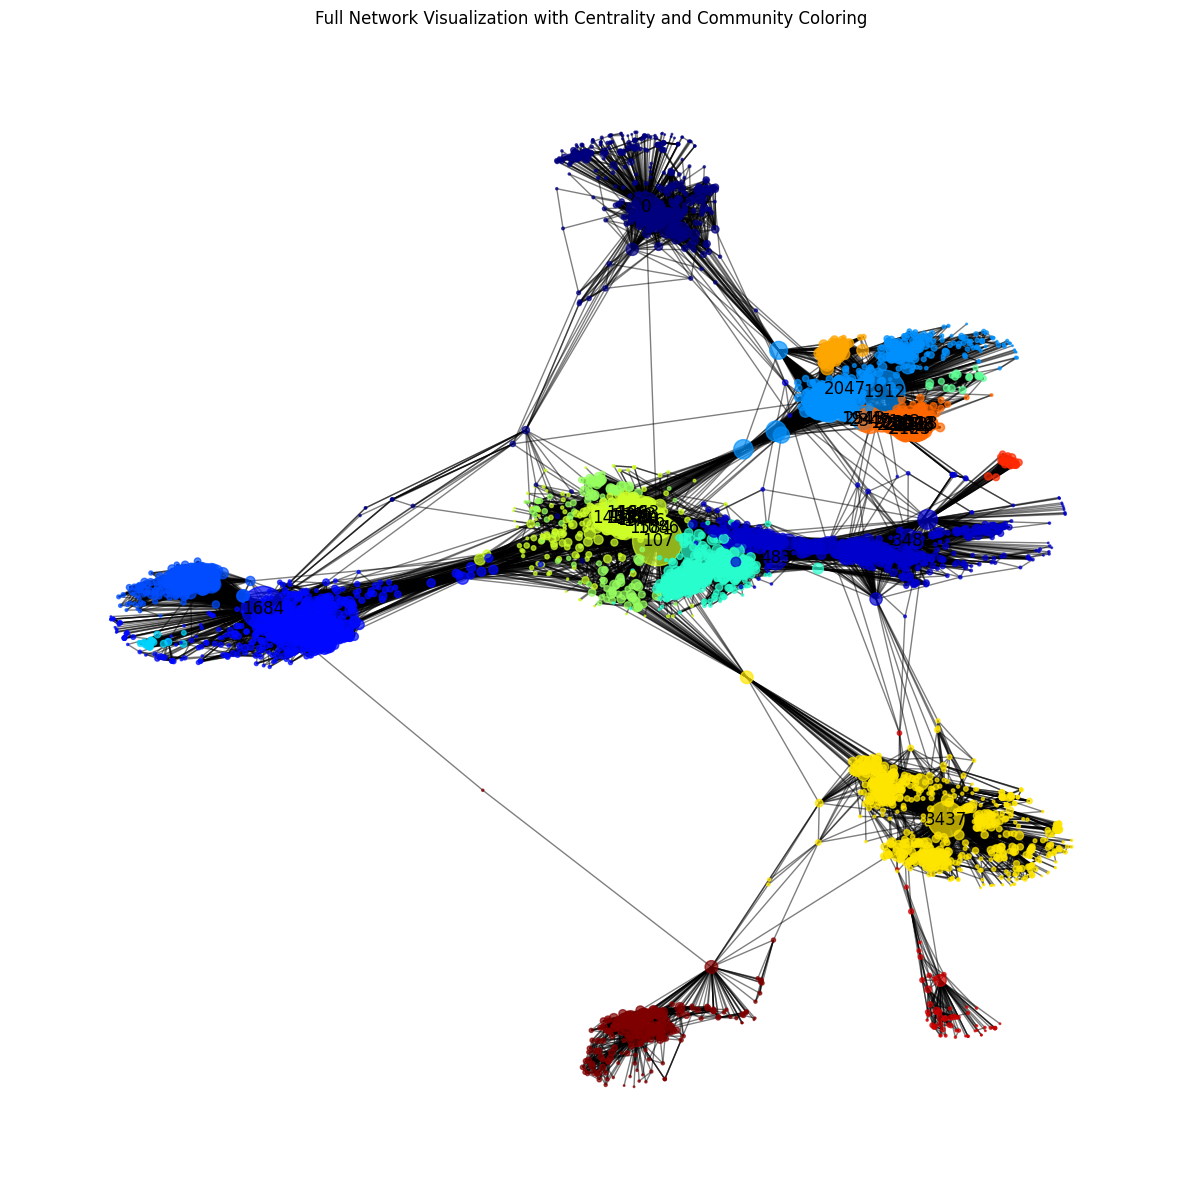

In [7]:
import matplotlib.pyplot as plt

# Calculate node positions using a layout algorithm
pos = nx.spring_layout(G, seed=42)  # For consistent layout between runs

# Draw nodes with a size proportional to their degree
node_sizes = [5000 * degree_centrality[n] for n in G]
node_colors = [partition[n] for n in G.nodes()]  # Colors by community

plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.jet, alpha=0.7)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Draw labels for highly central nodes only to avoid clutter
high_degree_nodes = [node for node in degree_centrality if degree_centrality[node] > 0.05]  # Adjust threshold as necessary
labels = {node: node for node in high_degree_nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color='black')

plt.title('Full Network Visualization with Centrality and Community Coloring')
plt.axis('off')
plt.show()


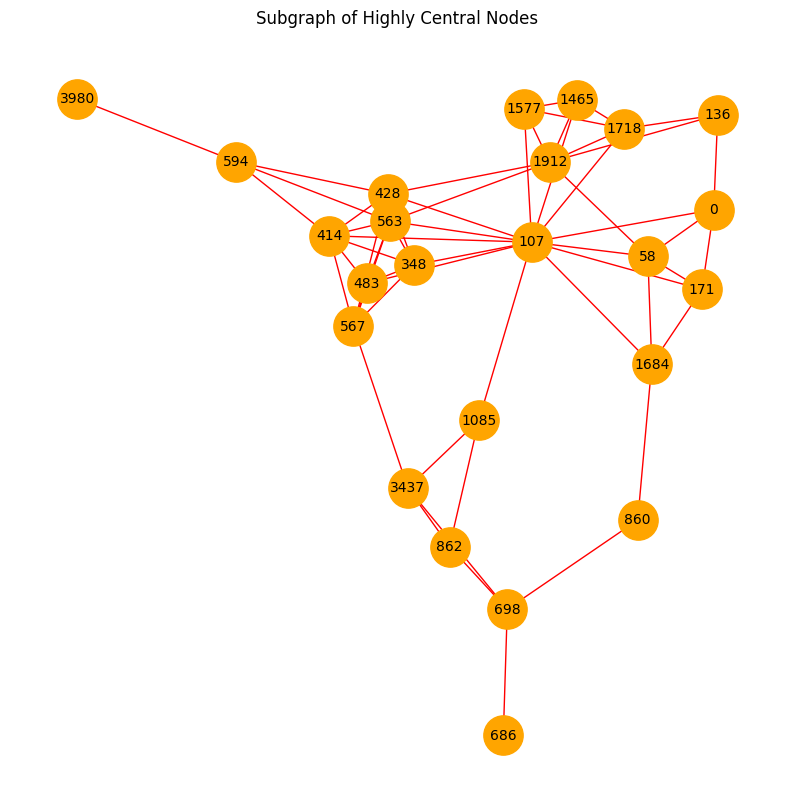

In [8]:
# Extract subgraph of nodes with high betweenness centrality
threshold = 0.01  # Set a threshold for betweenness centrality to define 'importance'
important_nodes = [node for node in betweenness_centrality if betweenness_centrality[node] > threshold]

subG = G.subgraph(important_nodes)

plt.figure(figsize=(10, 10))
sub_pos = nx.spring_layout(subG, seed=42)
nx.draw_networkx(subG, pos=sub_pos, with_labels=True, node_color='orange', edge_color='red', node_size=800, font_size=10)

plt.title('Subgraph of Highly Central Nodes')
plt.axis('off')
plt.show()
